# Notes - PCA
It's the most popular dimensionality reduction Algorithm.

Can be used for:-
1. Noise Filtering
2. Visualization
3. Feature Extraction
4. Stock Market prediction
5. Gene Data Analysis

It's Goal is to 
1. Identify patterns in data
2. Detect the correlation between variables, if there is strong correlation and it's found then we can reduce the dimensionality.

Steps in PCA:
1. Standardise the data
2. Obtain the _Eigen-Values_ and _Eigen-Vector_ from the covariance matrix.
3. Sort Eigen Values in Descending order and choose the k Eigen-Vectors that correspond to the k largest Eigen-Values where k is the No. of Dimensions of the new feature Subspace.
4. Construct the Projection metrix **W** from the selected _k_ Eigen Vectors.
5. Transfor the Original dataset **X** via **W** to obtain a _k_-Dimensional feature subspace **Y**.

* It learns about the relationship between X and Y values
* Finds the list of Principal axes.

Disadvatage :
* vulnerable to outliers.

## Importing the Dataset

In [1]:
import pandas as pd
data = pd.read_csv("Wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Separating features and Labels

In [2]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Splitting the dataset into Training and Testing data.

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Applying PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train) # Fitting and transforming the data 
x_test = pca.transform(x_test) #as x_test is a small dataset we will not fit the PCA on it.

## training the logistic regression model on the training set.


In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

## making the Confusion Metrix


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

97% Accuracy is amazing. 

Dimensionality reduction can also improve the final result by combining dimensionality reduction and the final model.

From StatQuest - https://www.youtube.com/watch?v=FgakZw6K1QQ

Steps in PCA: 
1. Calculate the centre of the data by calculating the avg value for F1 and avg value for F2.
2. Shifting the data so that the centre of the data is on top of the origin.
3. Find the best fitting line.

**How PCA Decides if the fit is good or not?**
* The best fitting line is the line which has the min distance from all the points in the data. or the largest SSD between the origin and the points plotted on the line. This line is called **PC1**.

4. Suppose the PC1 has a slope of 0.25 i.e. to make PC1 we need 4 units of F1 and 1 unit of F2. that means F1 describes most of the data. 

5. Now we need to scale down this PC1 to 1 unit. now this unit vector is called as the **Eigen vector** for PC1. and the proportion o each feature is called loading score.

6. **Eigen value** for PC1 is the Sum of Squares of Distances between the centre and the projected points on the line.

7. Now PC2 is the Orthogonal / Perpendicular line to PC1. similarly we will have eigen vector and eigen value for PC2.

8. A Scree plot is a graphical representation of the percentages of variation that each PC accounts for.

9. The no. of Pcs can be equal to the no. of features but by looking at the Scree plot we choose Only those Pcs Which explains most of the variance and neglect the others.



Source - https://www.youtube.com/watch?v=83x5X66uWK0&t=446s

Why do we need PCA?
- When we use lots of features while training the model the model gets overfitted onto the training data. Hence we need to reduce the features.

Source- https://www.youtube.com/watch?v=o0NNUeWNnL4&t=10s

1. $X$ and $Y$ will be given.
2. find mean of $X$ and $Y$ i.e. $\bar X$ and $\bar Y$.
3. Create Covariance metrix 

$$C = \begin{bmatrix} Cov(x,x) & Cov(x,y)  \\ Cov(y,x) & Cov(y,y) \end{bmatrix}$$

$$ Cov(x,y) = \frac{\sum_{i=1}^n{(X_i - \bar X)(Y_i - \bar Y)}}{N-1} $$

$$ C - \lambda \times I = 0 ........\lambda. is. Eigen. Value$$

$$ C \times V = \lambda \times V.......V. is. Eigen. Vector$$

# Curse of dimensionality:
1. Increase in computation time : Majority of the machine learning algorithms they rely on the calculation of distance for model building.
2. Hard (or almost impossible) to visualise the relationship between features

And for N-dimensions, the formula becomes:
Distance=$ \sqrt {(a_1-a_2)^2+(b_1-b_2)^2+(c_1-c_2)^2+…+(n_1-n_2)^2} $

This is the effort of calculating the distance between two points. Just imagine the number of calculations involved for all the data points involved.

**The questions that we need to ask at this point are:**

* Are all the features really contributing to decision making?
* Is there a way to come to the same conclusion using a lesser number of features?
* Is there a way to combine features to create a new feature and drop the old ones?
* Is there a way to remodel features in a way to make them visually comprehensible?

The answer to all the above questions is- _Dimensionality Reduction technique._



### What is a Dimensionality Reduction Technique?

Dimensionality reduction is a feature selection technique using which we reduce the number of features to be used for making a model without losing a significant amount of information compared to the original dataset.

## Principal Component Analysis: 
The principal component analysis is an unsupervised machine learning algorithm used for feature selection using dimensionality reduction techniques. As the name suggests, it finds out the principal components from the data. PCA transforms and fits the data from a higher-dimensional space to a new, lower-dimensional subspace This results into an entirely new coordinate system of the points where the first axis corresponds to the first principal component that explains the most variance in the data.

**What are the principal components?**
Principal components are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on.

## Steps to Calculate PCA

**Pre-requisite:** PCA assumes that the mean of all the individual columns is zero and the standard deviation is 1. So, before applying PCA, the data should be pre-processed appropriately.

* Let’s plot this on the XY plane and __calculate the average__ of the magnitude of all the points. Blue ones are the actual points and the yellow one is the average point.

<img src="points.PNG" width="200">

* Move the points so that the average point is on the origin. This is called a __Parallel Translation__. Although the coordinates of the points have changed, the corresponding distances among them remain the same.

<img src="move_average.PNG" width="300">

* Create the best fit line for the new data points. We first start with a random line(blue one), and then try to find the best fit line(the green one) so that the distance from individual data points is minimum and consequently the distance from origin is maximum. This best fit line is called Principal component1 or PC1.

<img src="best_fit.PNG" width="300">

* PC2 is a line perpendicular to the PC1.
* Then the axes PC1 and PC2 are rotated in a way that PC1 becomes the horizontal axis.
<img src="axis_rotate.PNG" width="300">
* Then based on the sample points the new points are projected using PC1 and PC2. Thus we get the derived features. 
<img src="projected_points.PNG" width="300">

the next question is: **what is the optimum number of Principal components needed?**

#### Explained Variance Ratio

It represents the amount of variance each principal component is able to explain.

EVR of PC1=$$ \frac{Distance. of. PC1. points}{( Distance. of. PC1. points + Distance. of. PC2. points)} $$

We will select the PCs which explains most of the variance in the data.

In a real-life scenario, this problem is solved using the **Scree Plots**

## Scree Plots:
Scree plots are the graphs that convey how much variance is explained by corresponding Principal components. 
<img src="scree.PNG" width="500">

As shown in the given diagram, around 75 principal components explain approximately 90 % of the variance. Hence, 75 can be a good choice based on the scenario


## Python Implementation:

we are using the free glass datset.

The objective is to tell the type of glass based on amount of other elements present.

## Importing the dataset

In [31]:
import pandas as pd
data = pd.read_csv("glass.data")
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Pre-procession 
Checking for the Null values

In [32]:
data.isna().sum()

index    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

Great there are no Null values. Now let's drop the index and the last column

In [33]:
data1 = data.drop(columns=["index", "Class"])
data1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [34]:
data.describe()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## standardize the data

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1)

In [36]:
df = pd.DataFrame(data=scaled_data, columns=data1.columns)

In [37]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.740072e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


## Performing PCA

## 1. Find all the possible Principal Components

In [38]:
from sklearn.decomposition import PCA
pca = PCA()

# Find all the principal cpmponents
principal_components = pca.fit_transform(df)

In [39]:
print(principal_components)

[[ 1.15113957 -0.52948764 -0.37209565 ... -0.39560005 -0.19716008
   0.01634649]
 [-0.57413717 -0.75978777 -0.55670817 ... -0.02415793 -0.28421356
  -0.0107898 ]
 [-0.94015972 -0.92983597 -0.55490744 ... -0.36751757 -0.09594067
   0.02164019]
 ...
 [-1.68024627  3.28482346 -0.93034851 ...  0.67412231 -0.89170969
   0.04628358]
 [-2.36974768  2.7568728  -1.23470076 ...  0.67889932  0.07446015
  -0.02730068]
 [-2.26264885  3.02859155 -0.89084474 ...  0.46246107  0.0633149
  -0.01944978]]


In [40]:
print(pca.explained_variance_ratio_)

print("\n", np.cumsum(pca.explained_variance_ratio_))

[2.79018192e-01 2.27785798e-01 1.56093777e-01 1.28651383e-01
 1.01555805e-01 5.86261325e-02 4.09953826e-02 7.09477197e-03
 1.78757536e-04]

 [0.27901819 0.50680399 0.66289777 0.79154915 0.89310496 0.95173109
 0.99272647 0.99982124 1.        ]


## 2. Plot the SCREE Plot and select the No. of PCs for Transformation

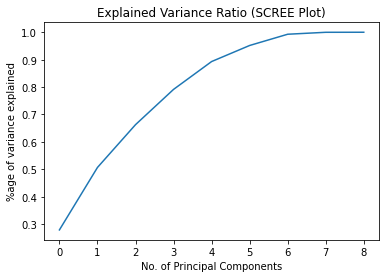

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance Ratio (SCREE Plot)")
plt.xlabel("No. of Principal Components")
plt.ylabel("%age of variance explained")
plt.show()

Now, Just look at the graph above

* 4 principal components explains 90% of variance.
* 5 principal components explains 95% of variance.
* and 6 principal components explains 98% of variance.

Hence Instead of using all the Columns is the data we will use just these 4 PCs and still get accurate results.

## Transforming the original data in the forn of principal components

In [42]:
pca = PCA(n_components=4)

# Transforming the data in the form of Principal Components.
new_df = pca.fit_transform(df)

In [43]:
principal_df = pd.DataFrame(data=new_df, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [44]:
principal_df.head()

,PC1,PC2,PC3,PC4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102


## Application of PCA to the Digits Data
Let's Implement PCA to the Digits Data. This data consists of Different points in the plane to represent a digit.

## Import the Digits Dataset

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

## Separating Features and Targets

In [10]:
x = digits.data
print(x)
print("\n Dimensions of X:",x.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

 Dimensions of X: (1797, 64)


In [11]:
y = digits.target
print(y)
print("\n Dimensions of Y:", y.shape)

[0 1 2 ... 8 9 8]

 Dimensions of Y: (1797,)


So in the dta we have 64 Dimensions so we cannot plot them directly.

So for visualizing our dta we need to Reduce the Dimension to 2 to plot a scatter plot.

## performing PCA for visualization

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_projected = pca.fit_transform(x)
print("Dimensions of x_projected:", x_projected.shape)

Dimensions of x_projected: (1797, 2)


## Visualizing the dta points

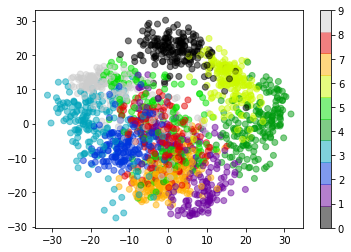

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x_projected[:, 0], x_projected[:, 1], c=y, alpha=0.5, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

This gives us an idea of the relationship between the datapoints. Essentially, we have made the data of 64 dimension fit to a 2-Dimensional space that allows us to see the layout of the digits

### Performing the PCA on Actual Images of Digits. 

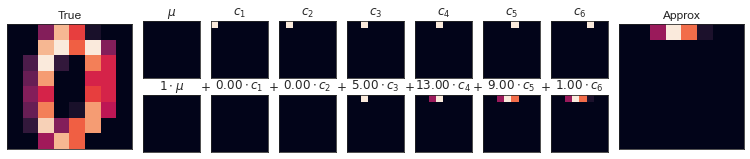

In [23]:
"""
Before running this Cell, 
1. Check if fig_code folder is the working Directory,
2. if not, download the fig_code library from Git
""" 
from fig_code.figures import plot_image_components
import seaborn as sns

sns.set_style('white')
plot_image_components(digits.data[0])

If we reduce the dimensionality in the pixel space to (say) 6, we recover only a partial image as shown above.

Pixel-wise representation of those digits is not the only choice we have. We can also use other *basis functions*, and show it like:

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

What PCA does is to choose optimal **basis functions** so that only a few are needed to get a reasonable approximation.
The low-dimensional representation of our data is the coefficients of this series, and the approximate reconstruction is the result of the sum:


## Choosing the No. of Components by Explained variance Ratio Plot

In [34]:
import seaborn as sns
import numpy as np
sns.set()   # Gives a grid to the plot
pca = PCA().fit(x)
plt.plot(np.cumsum((pca.explained_variance_ratio_)))
plt.title("Explained Variance Ratio Plot / SCREE Plot")
plt.xlabel("No. of Component")
plt.ylabel("variance")

LinAlgError: SVD did not converge

* 20 principal components explains 90% of variance.
* 25 principal components explains 95% of variance.

which is better that computing for all 64 features.

**Pros of PCA:**

- Correlated features are removed.
- Model training time is reduced.
- Overfitting is reduced.
- Helps in better visualizations
- Ability to handle noise

**Cons of PCA**
- The resultant principal components are less interpretable than the original data
- Can lead to information loss if the explained variance threshold is not considered appropriately.
